Module importing

In [1]:
import sys
import torch
import random
import numpy as np
import torch.nn as nn
import torch.optim as optim
import scipy.signal as signal
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset

sys.path.append('/workspace/my_DL_tool/model')
from lstm_unet import lstm_unet
sys.path.append('/workspace/my_DL_tool/tool')
from model_builder import k_fold_training
from performance import performance
sys.path.append('/workspace/my_DL_tool/tool/data_load')
from ppg_labeled_load import PPGDataset

Data prepairing

(1024,)


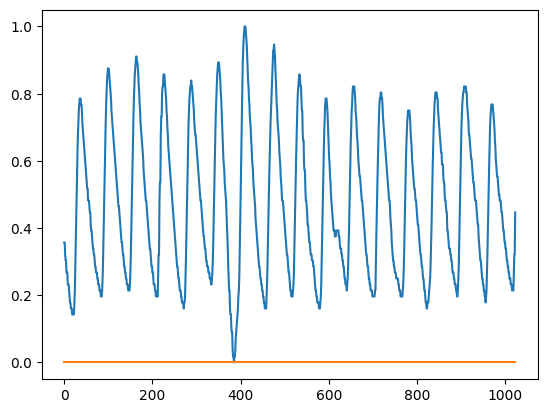

438
2190


In [2]:
def preprocess(data):
    if np.sum(data["Syn_Label"])>1:
        signal = data["Syn_PPG"]
        label = [1 if x > 0 else x for x in data["Syn_Label"]]
    return signal,label

#AF = 1, PAC,PVC = 2
def preprocess_case_1(data):
    s = data["Syn_PPG"]
    l = [2 if x in [3,4,5,6,7,8,9,10,11] else x for x in data["Syn_Label"]]
    return s,l

#AF = 1, PAC,PVC = 2, PAC,PVC-couple = 3
def preprocess_case_2(data):
    s = data["Syn_PPG"]
    l = [2 if x in [3,4] else x for x in data["Syn_Label"]]
    l = [3 if x in [5,6,7,8,9,10,11] else x for x in data["Syn_Label"]]
    return s,l

#Import_data
dataset = PPGDataset('/workspace/my_DL_tool/data/packaged_data',preprocessing=preprocess_case_1)
index = random.randint(0, len(dataset)-1)
z = dataset[0][0].numpy().flatten()
print(z.shape)
plt.plot(dataset[0][0].numpy().flatten())
plt.plot(dataset[0][1].numpy().flatten())
plt.show()

N = len(dataset)
test_len = int(N*0.2)
train_len = N-test_len

train_data, test_data = random_split(dataset, [train_len, test_len])
print(len(test_data))
print(len(dataset))

Training

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

para = {"Serie length":         1024,
            "Input size":           1,
            "Hidden size":          100,
            "Number layers":        2,
            "Encoder structure":    [100,64,128,256,512], 
            "Decoder structure":    [512,256,128,64,1],
            "Kernel size":          [3,3,3,3,3,3,3,3,3],
            "Kernel encoder":       [4,4,4,4],
            "Kernel decoder":       [2,2,2,2],
            "Stride":               [2,2,2,2],
            "Activate function":    nn.Tanh()
    }

model = lstm_unet(para)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
# builder = k_fold_training(train_data, 1, criterion = nn.L1Loss())
builder = k_fold_training(train_data,1,credits = nn.L1Loss())
builder.training(model,device,optimizer,num_epochs=1000,batch=64,visualize=1)

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True
Iteration: 1/1000. loss_train: 0.6611635195357459. loss_val: 0
Iteration: 2/1000. loss_train: 0.6288452127150127. loss_val: 0
Iteration: 3/1000. loss_train: 0.617259110723223. loss_val: 0
Iteration: 4/1000. loss_train: 0.6125911580664771. loss_val: 0
Iteration: 5/1000. loss_train: 0.6082153490611485. loss_val: 0
Iteration: 6/1000. loss_train: 0.6056983343192509. loss_val: 0
Iteration: 7/1000. loss_train: 0.5952246934175491. loss_val: 0
Iteration: 8/1000. loss_train: 0.5835174194404057. loss_val: 0
Iteration: 9/1000. loss_train: 0.5746891157967704. loss_val: 0
Iteration: 10/1000. loss_train: 0.5720122541700091. loss_val: 0
Iteration: 11/1000. loss_train: 0.5689550936222076. loss_val: 0
Iteration: 12/1000. loss_train: 0.5617255036320005. loss_val: 0
Iteration: 13/1000. loss_train: 0.5631306426865714. loss_val: 0
Iteration: 14/1000. loss_train: 0.5593709349632263. loss_val: 0
Iteration: 15/1000. loss_train: 0.5545144485575813. loss_val: 0
Iteration: 16/1000. loss_train: 0.55867056122

Performance

Max loss:  12.033887
Mean loss:  0.3312324
Min loss:  0.028218262
Number of test:  219


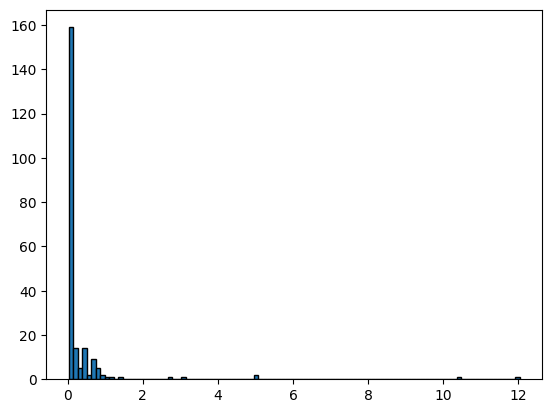

0.3894043


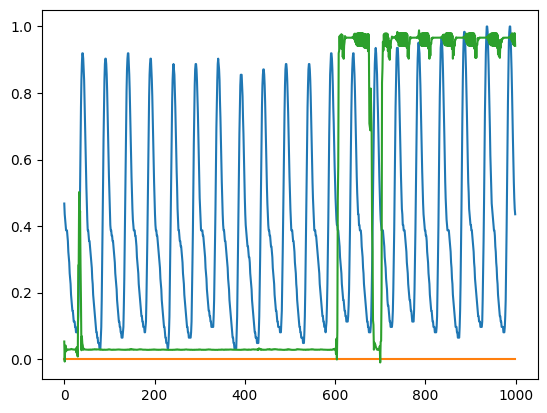

0.028423158


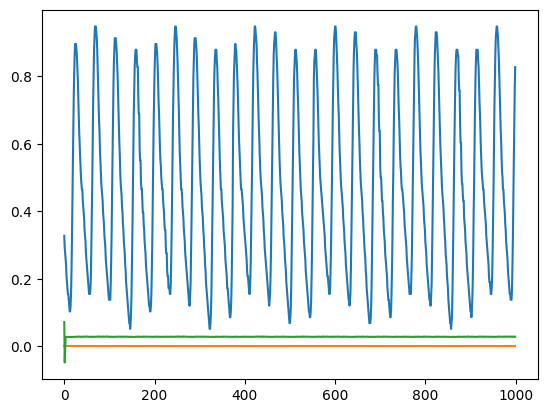

0.14699486


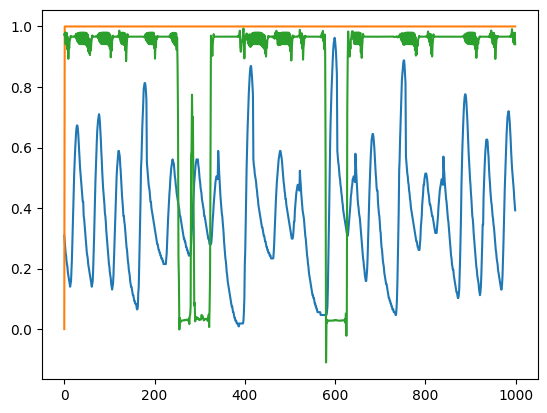

0.03563991


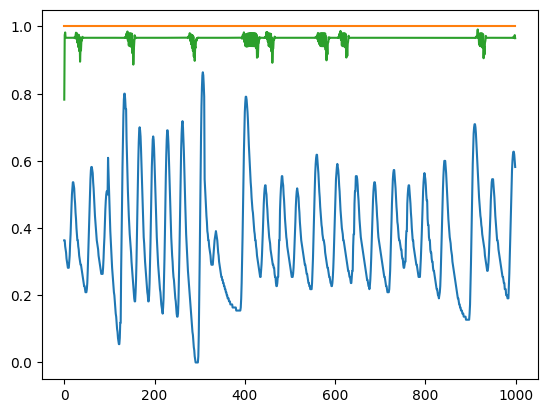

0.037325714


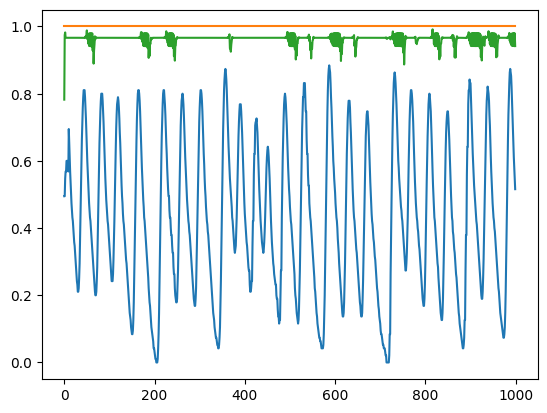

0.035198208


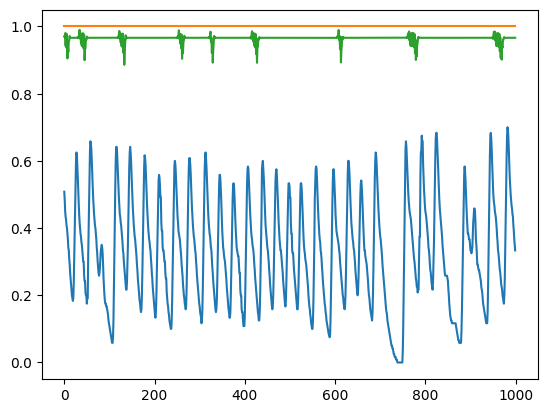

0.6922754


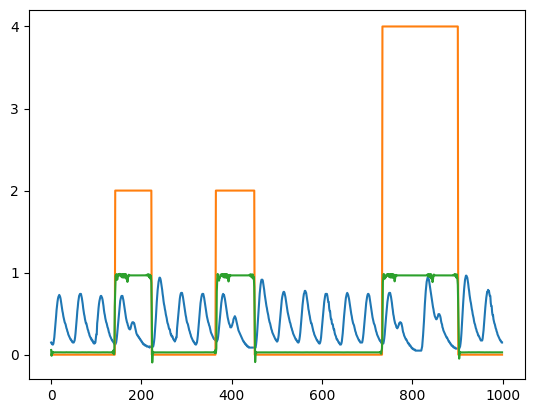

0.036528394


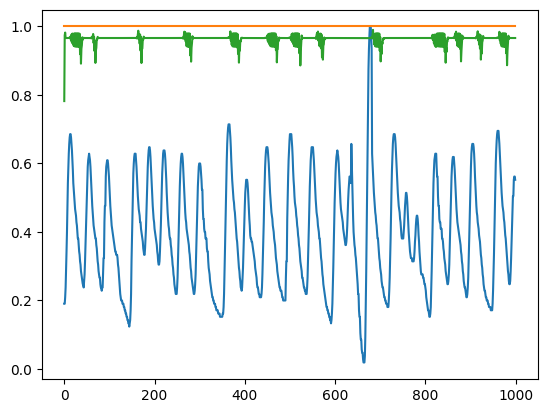

0.035128005


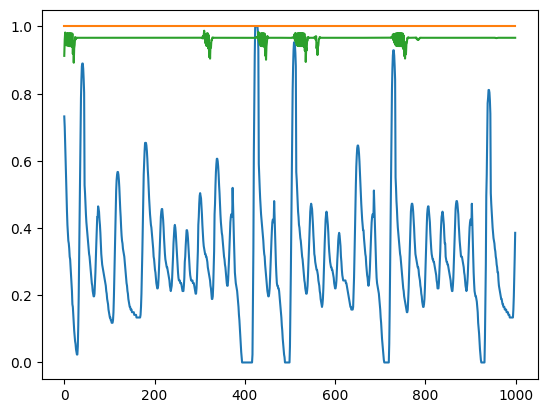

0.028235976


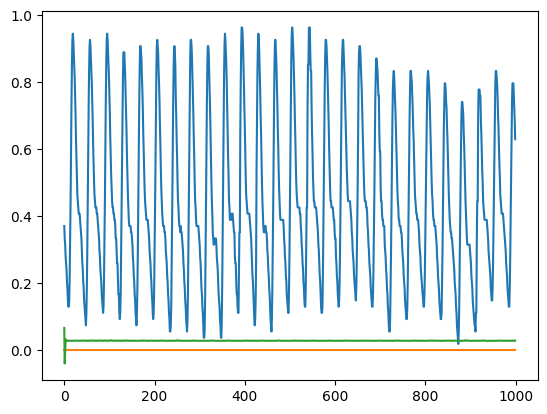

0.14831054


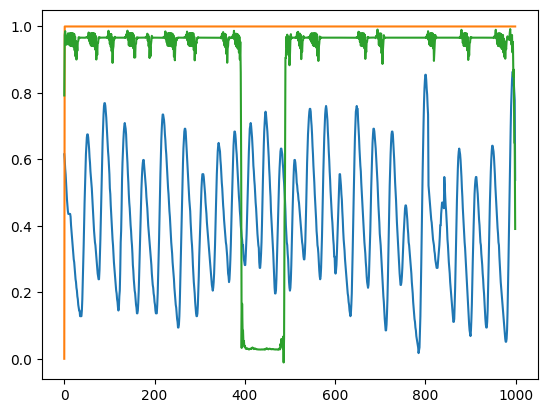

0.9029254


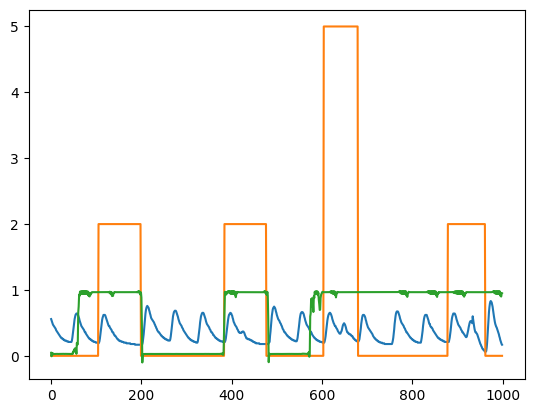

0.028410895


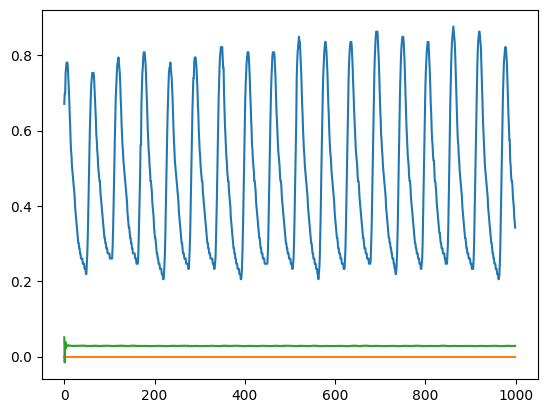

0.035576276


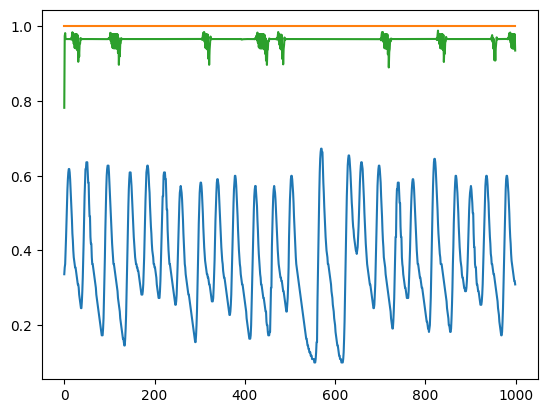

0.119330235


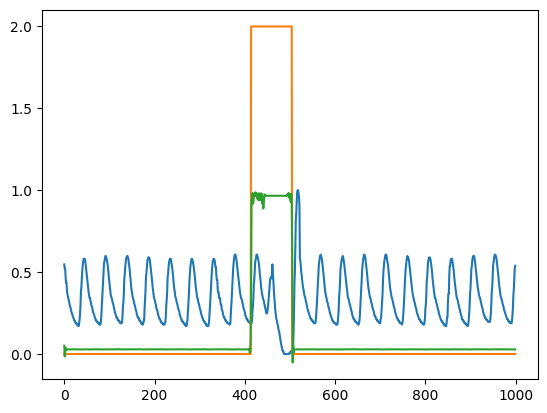

0.028260756


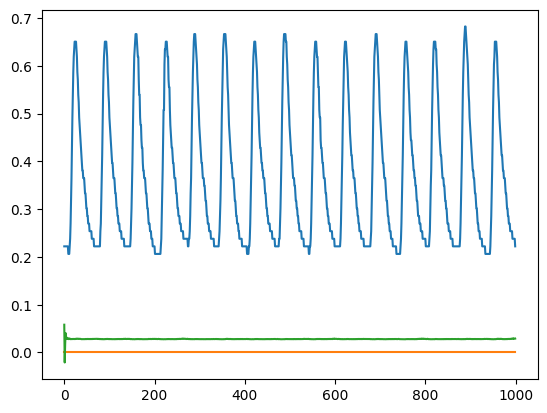

0.035238676


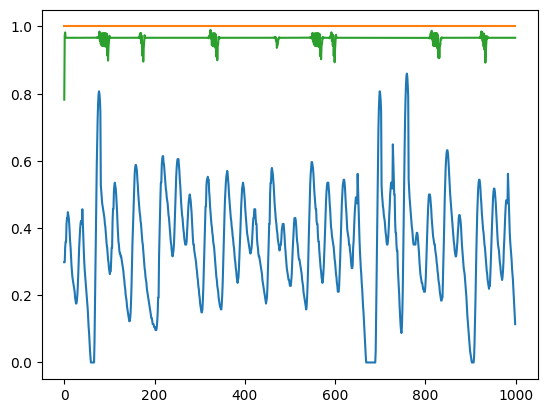

0.028407307


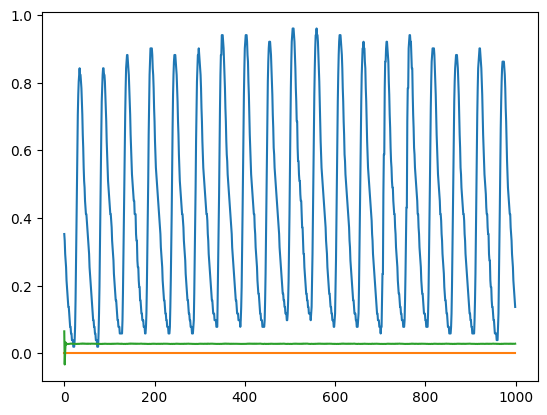

0.028365307


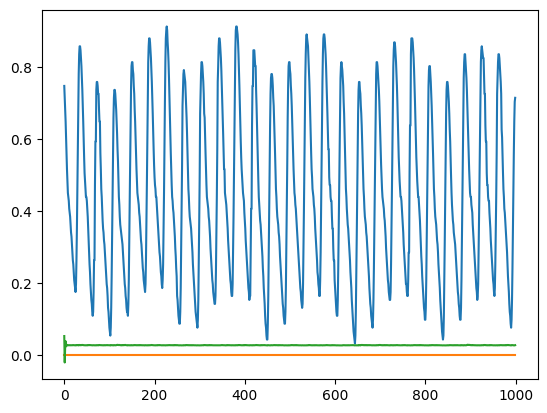

0.14934248


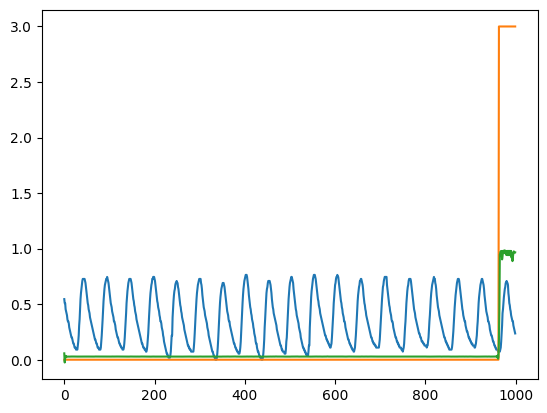

0.06663524


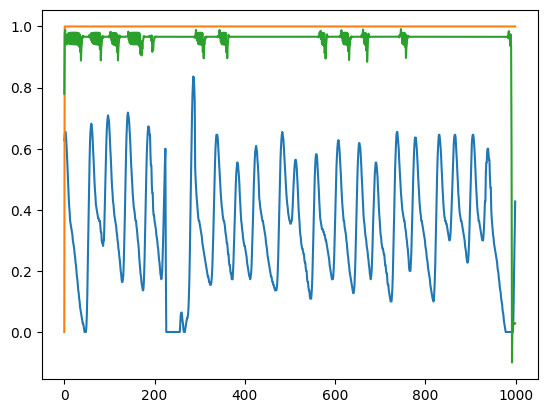

0.034353707


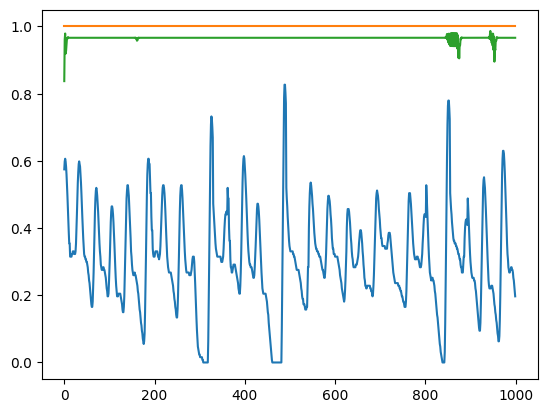

0.028406538


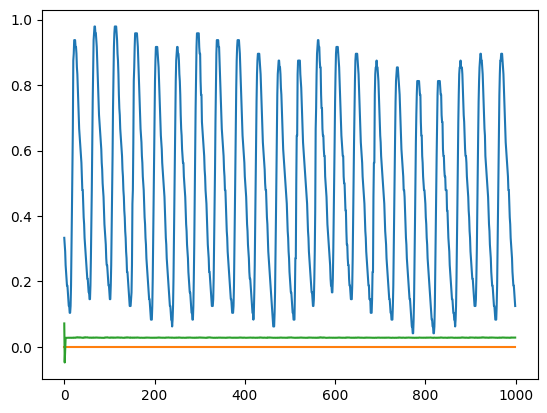

0.035804737


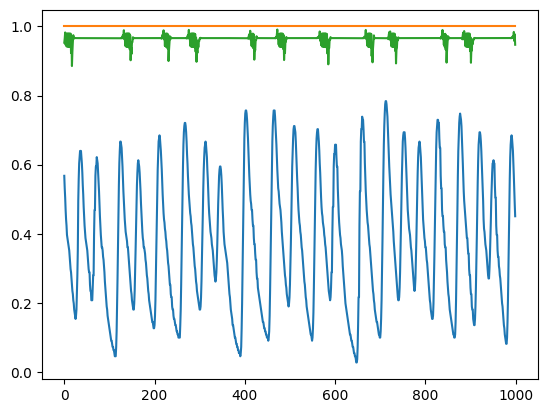

0.028497204


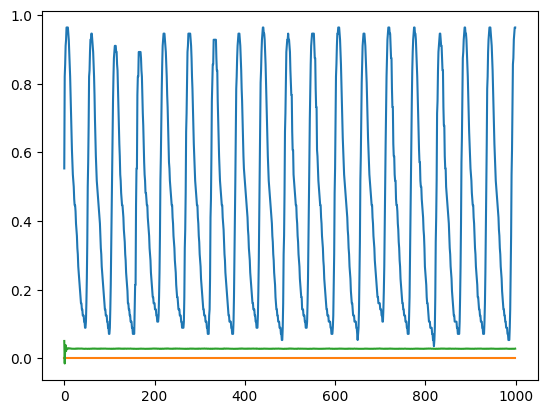

0.079087734


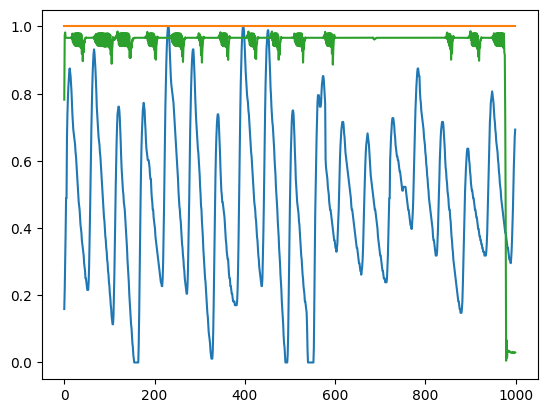

0.22318526


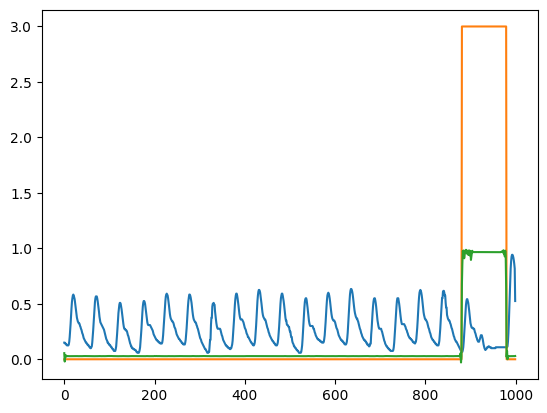

0.028312402


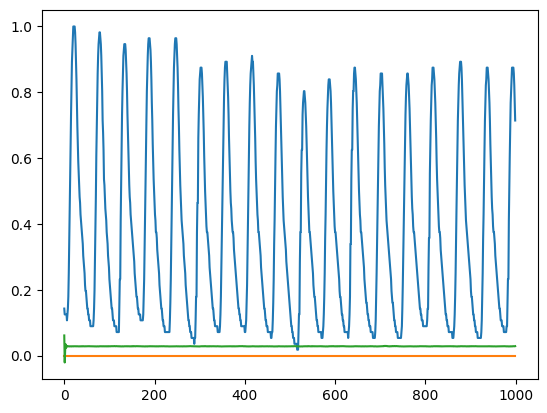

0.028265594


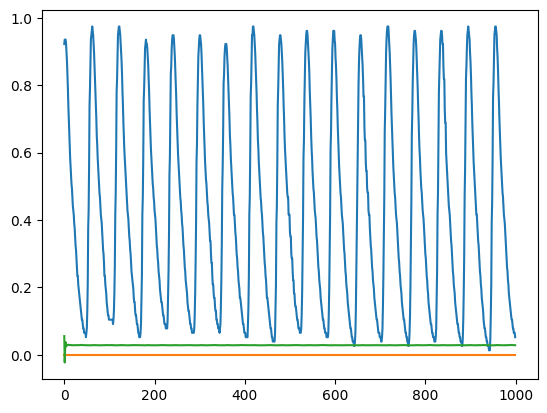

0.7569991


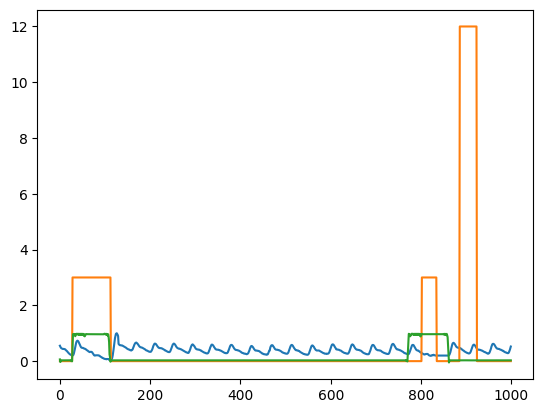

0.0346537


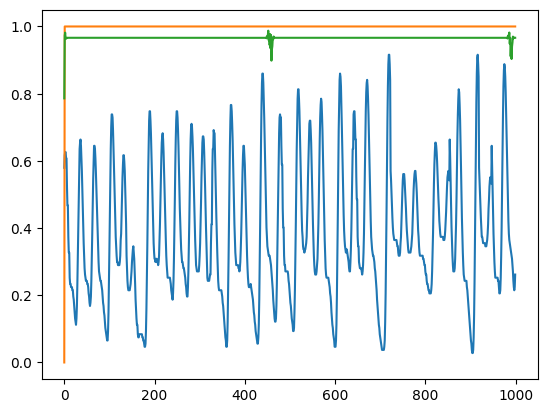

0.034306303


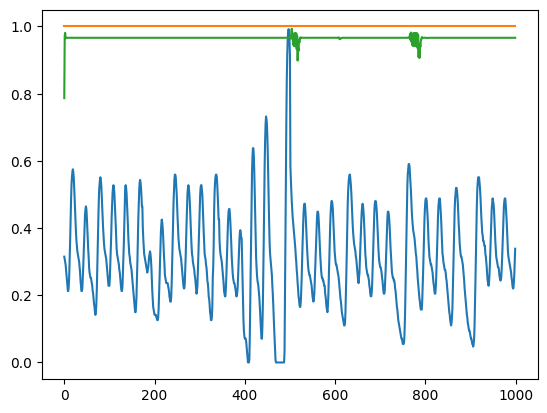

0.46717516


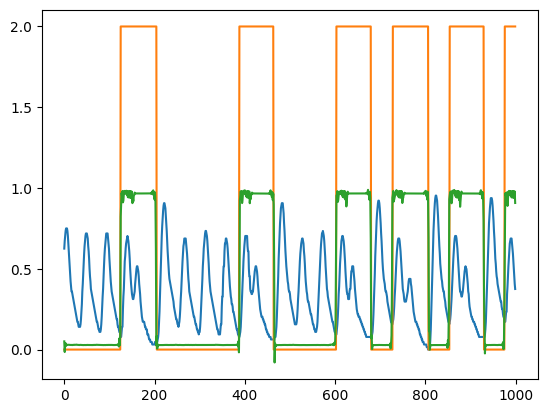

0.6768805


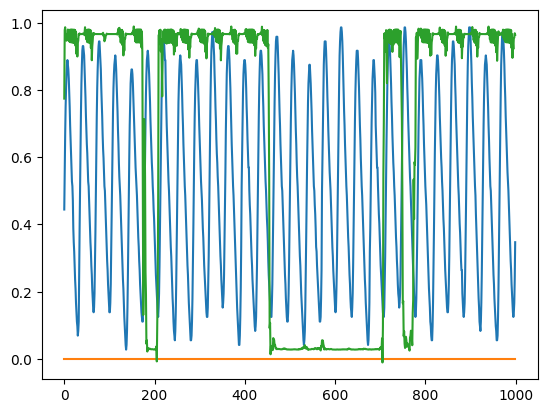

0.02839356


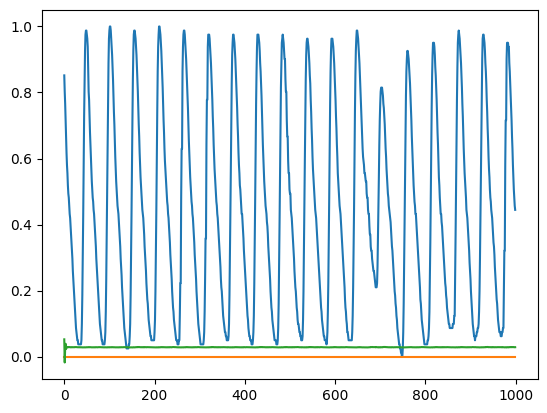

0.028410656


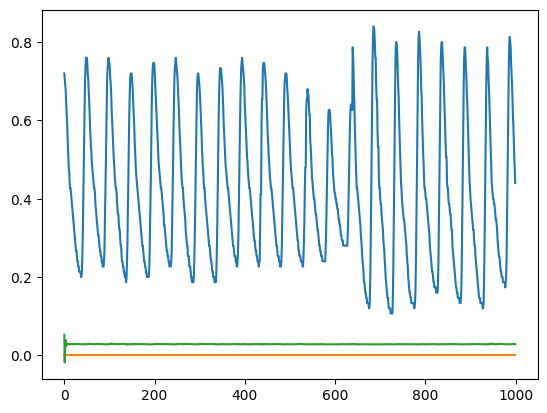

0.49286518


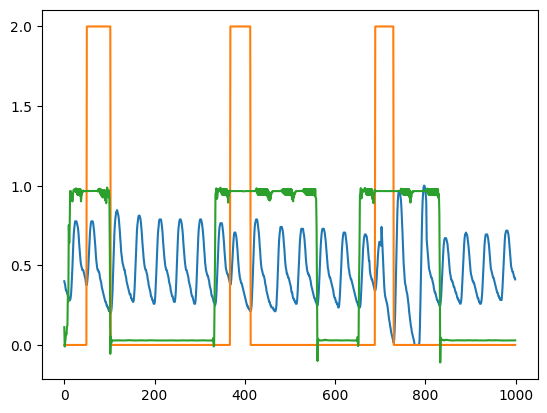

0.028317753


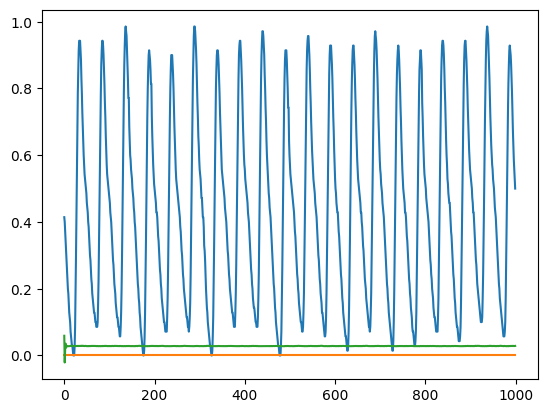

0.028319068


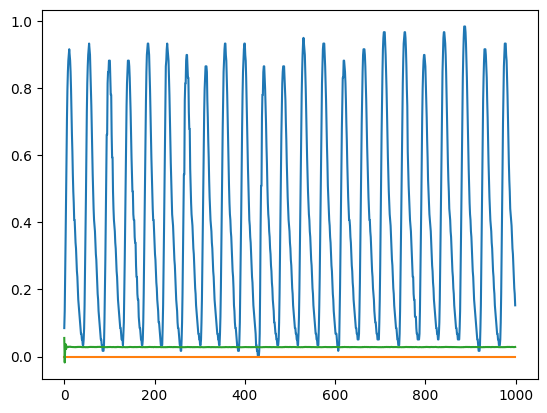

0.028342381


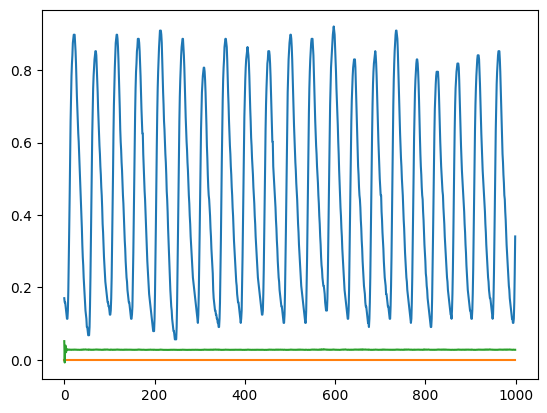

0.028439103


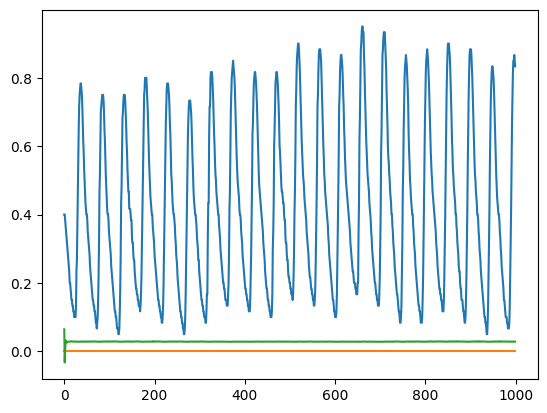

0.034819655


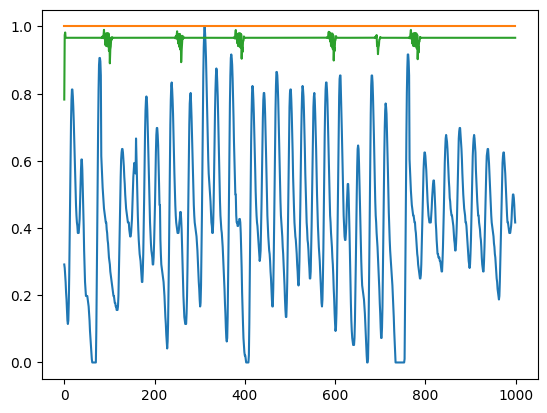

0.02844742


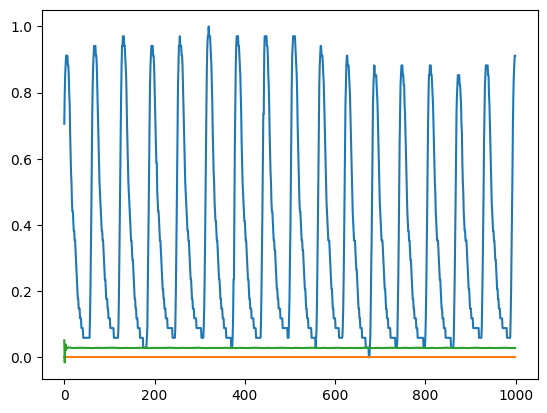

0.02843193


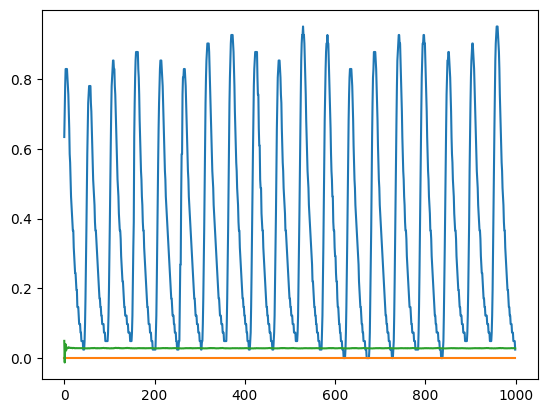

0.33422893


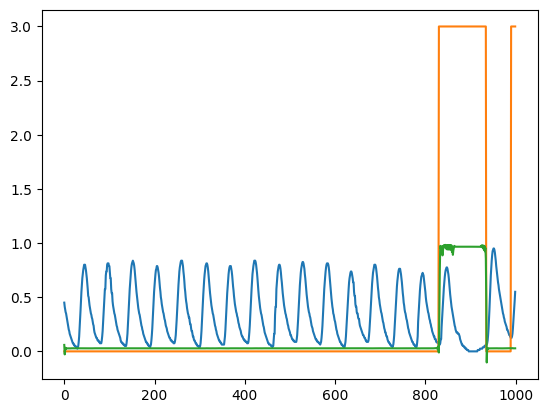

0.028429952


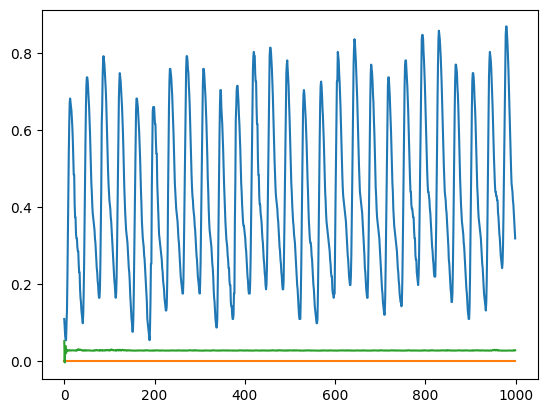

0.68582165


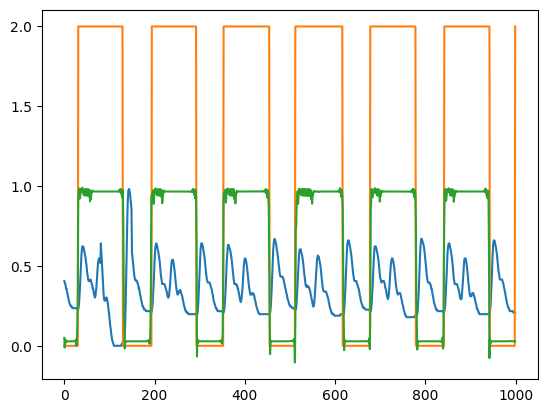

0.028351549


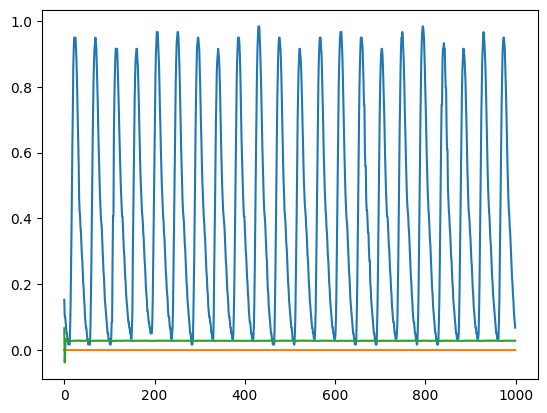

0.09931129


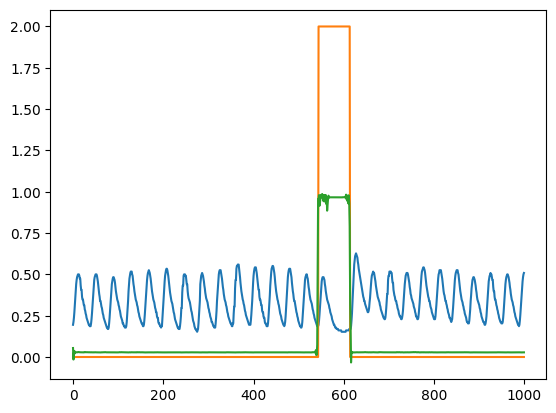

0.7007748


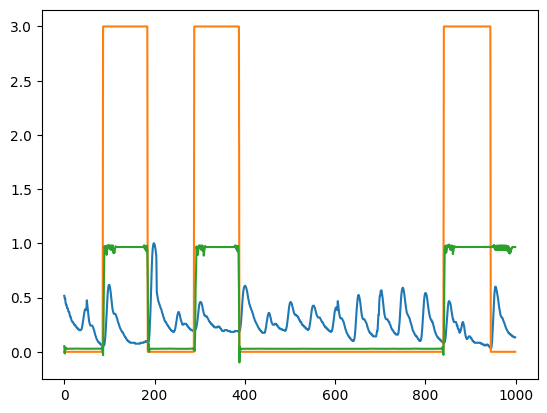

0.11696141


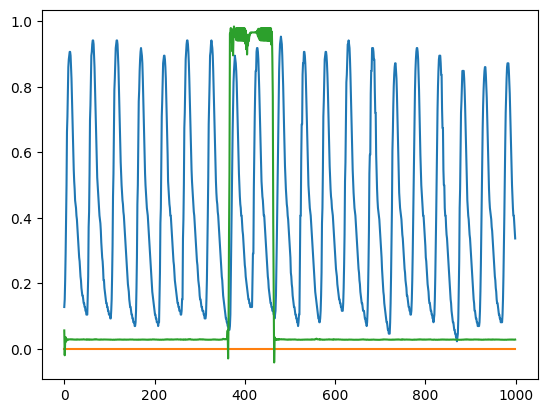

0.028424297


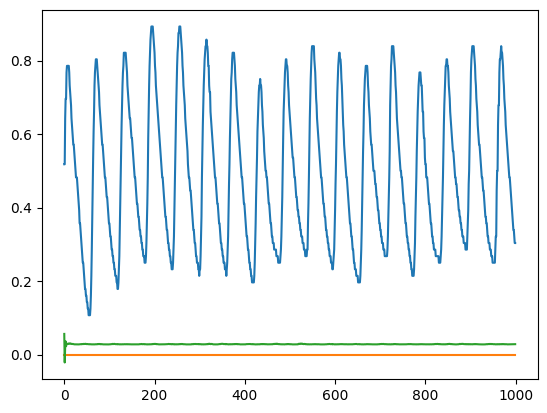

0.028328765


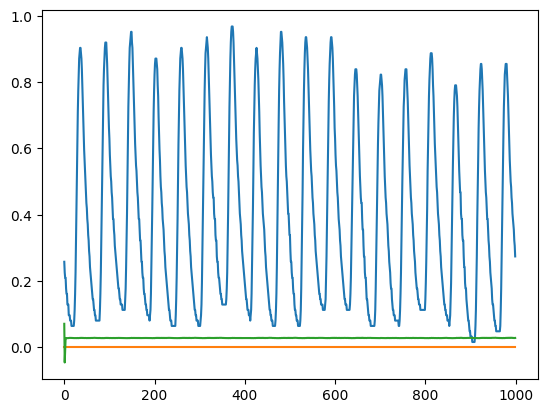

0.037610665


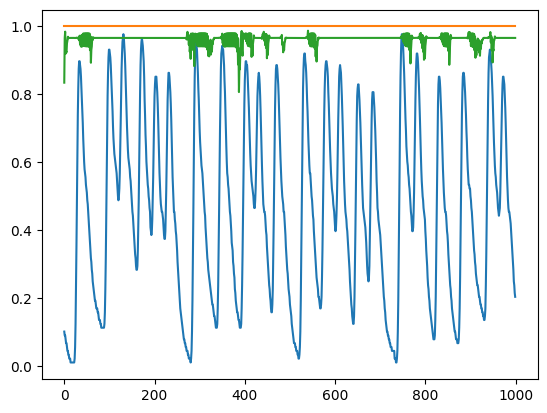

0.02834215


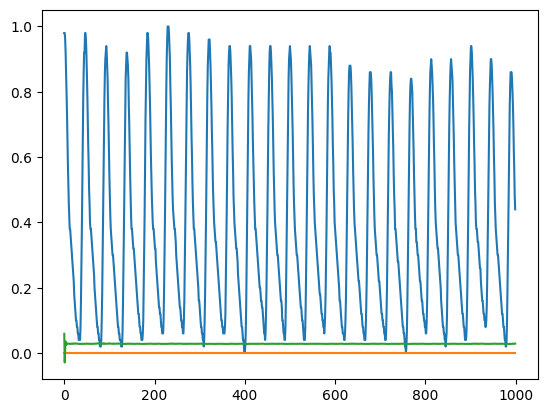

0.036767647


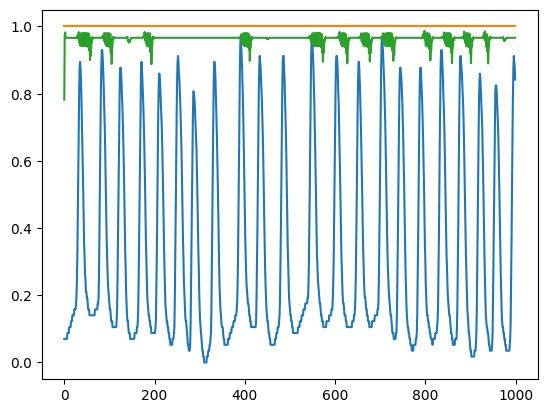

0.028417433


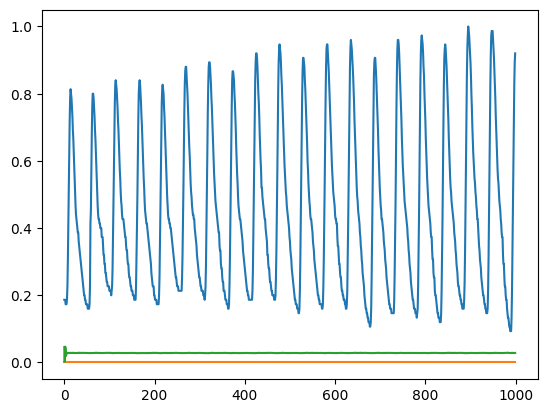

0.18674847


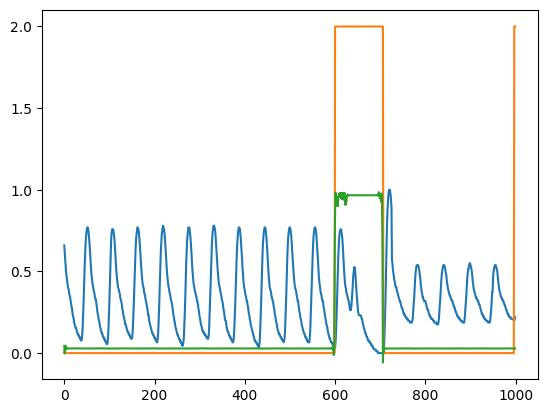

3.0767891


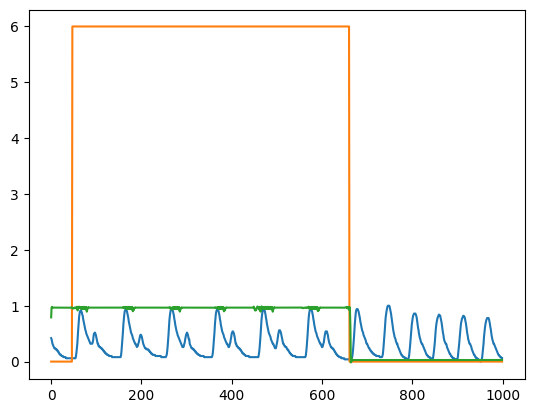

0.028408365


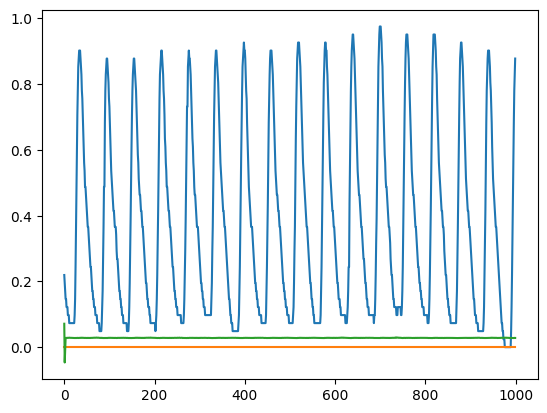

0.028339524


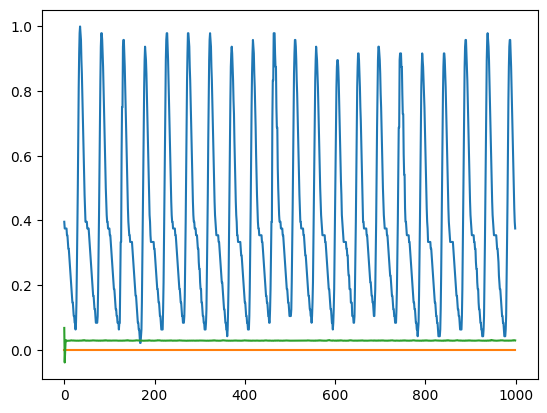

0.03507819


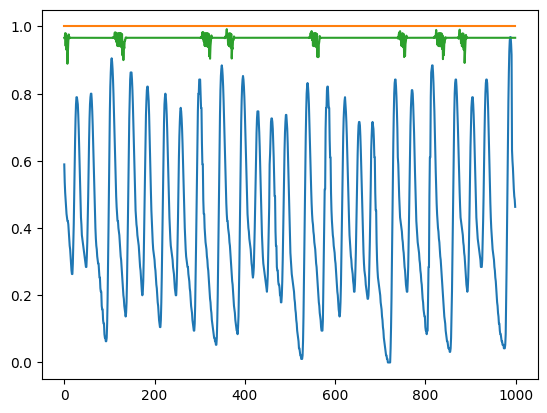

0.028385635


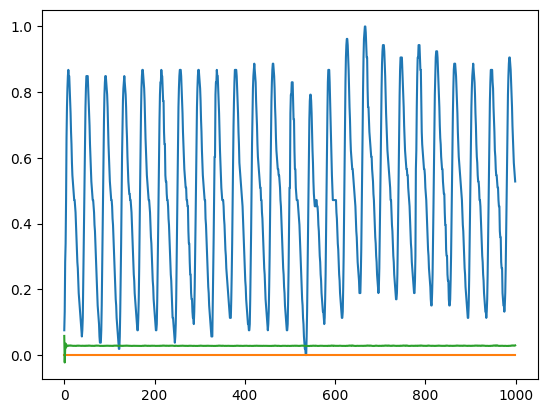

0.45046


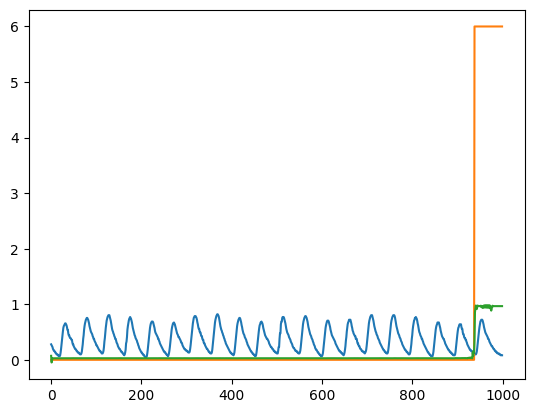

0.028468017


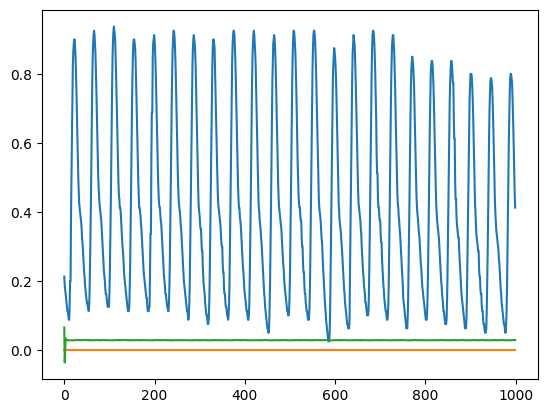

0.089519784


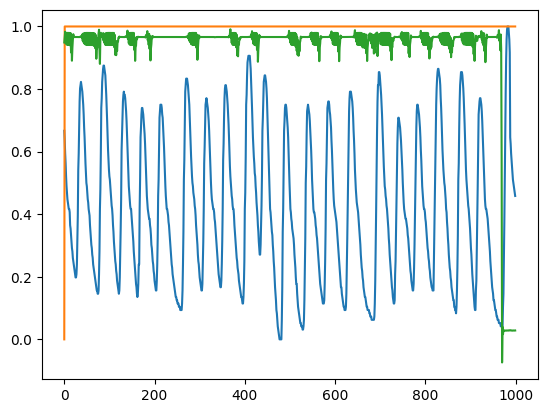

0.02830995


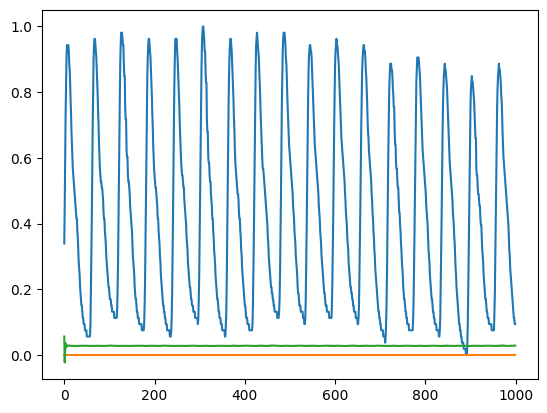

0.028333452


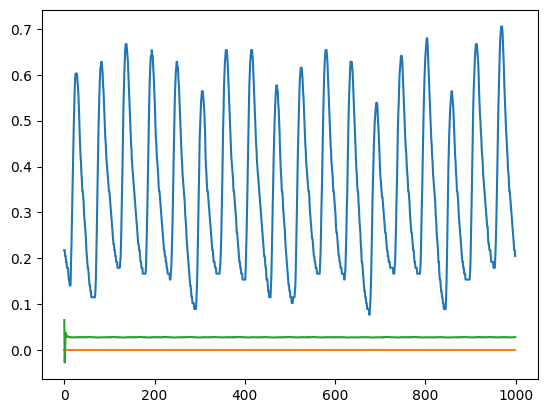

0.034360476


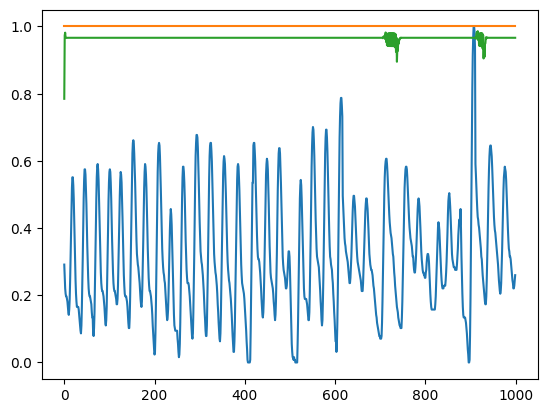

0.02842652


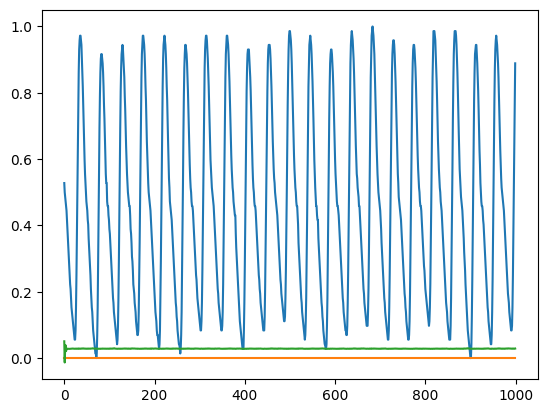

0.82398903


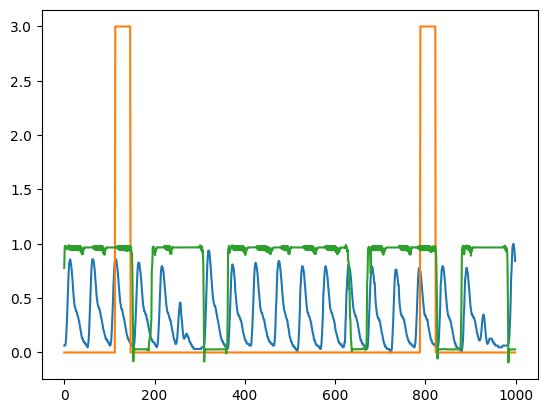

0.6086977


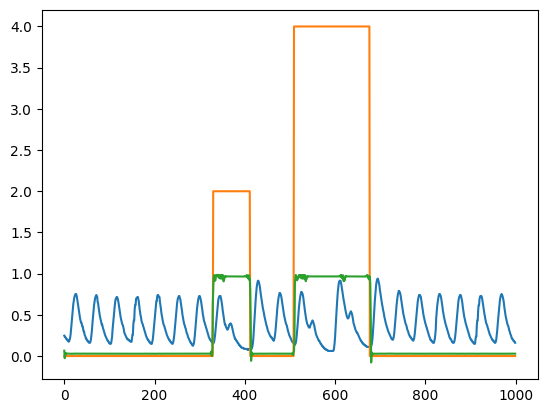

0.02848244


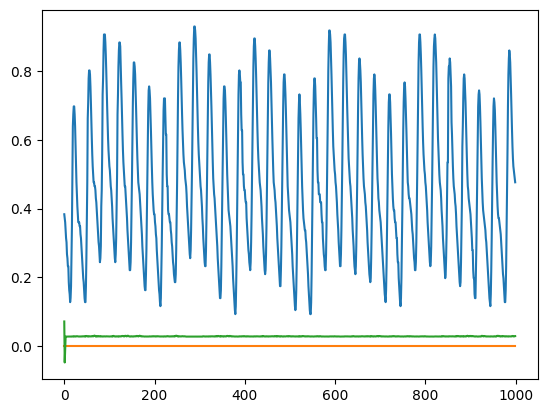

0.26845163


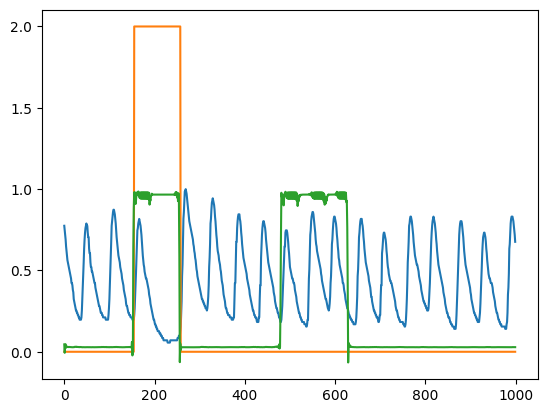

0.4075864


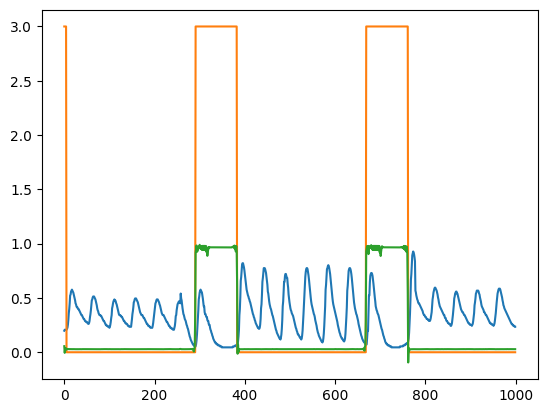

0.036617115


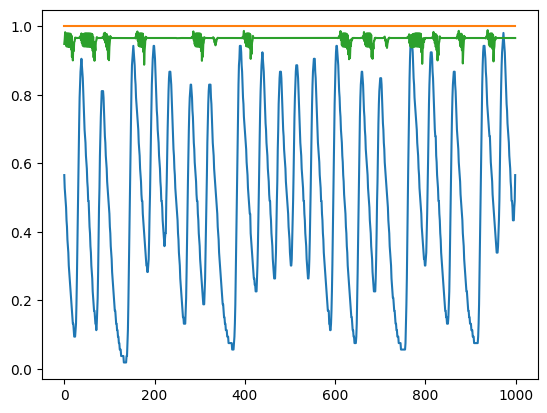

0.028464586


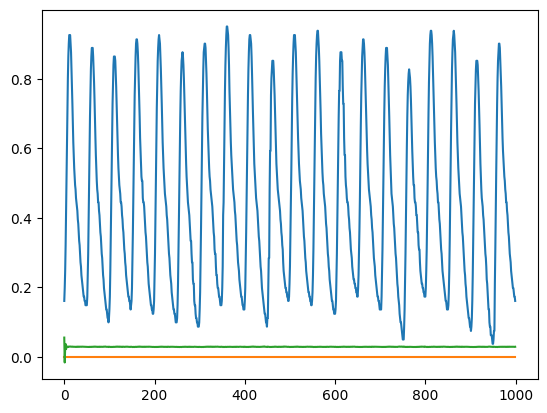

0.028321845


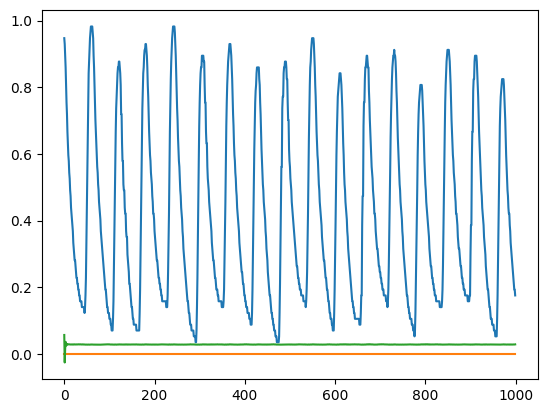

0.028288394


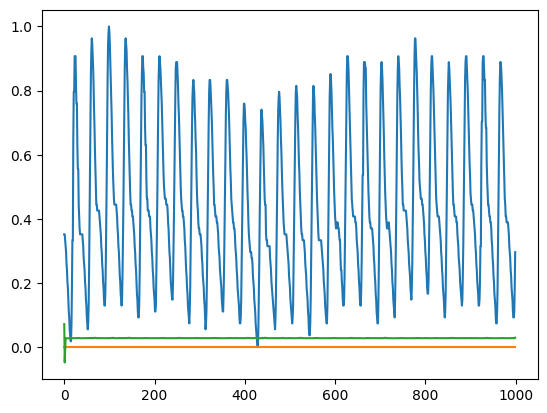

0.028410442


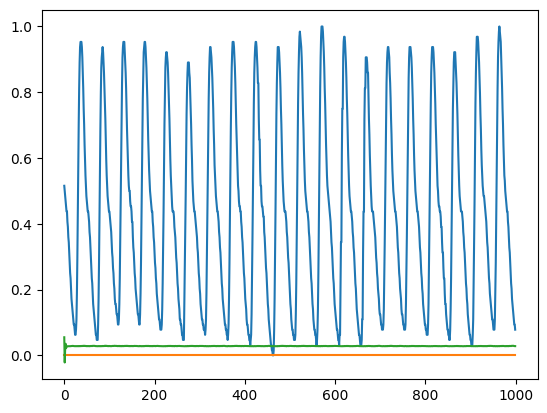

0.0426892


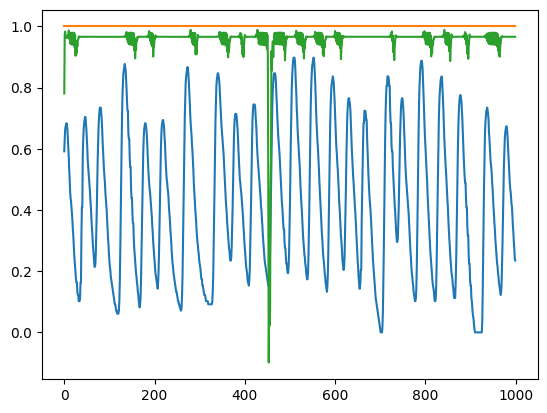

0.03431336


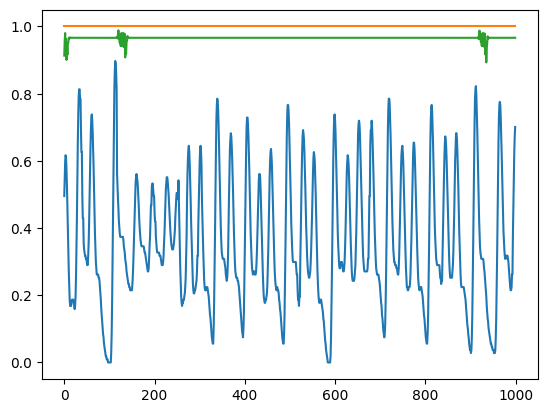

0.028326057


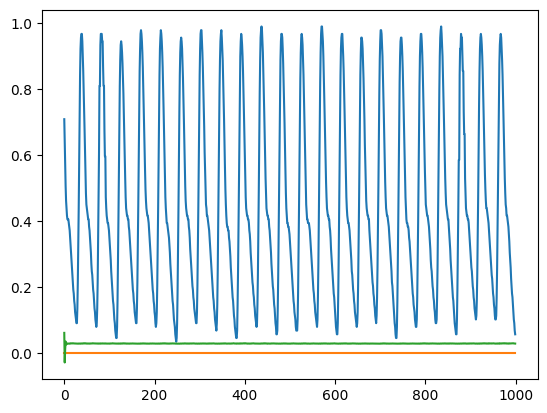

0.035184406


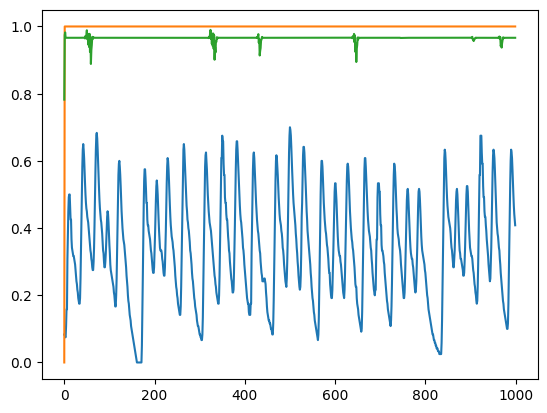

0.028432576


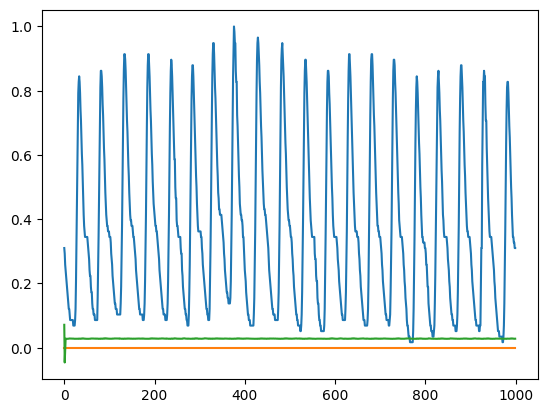

0.5066789


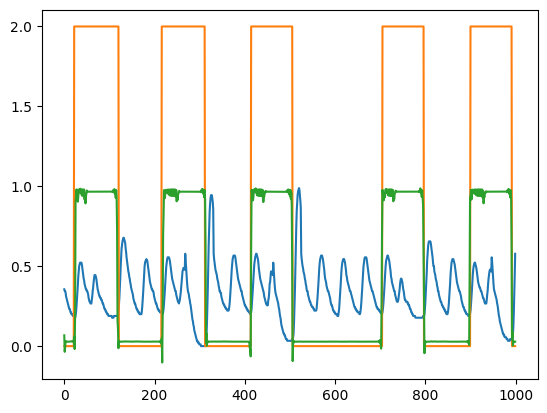

0.41979644


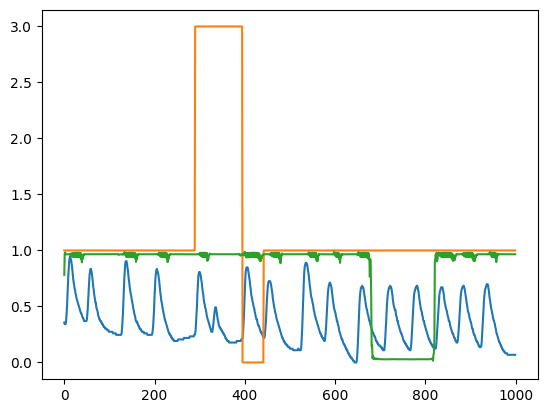

0.035853438


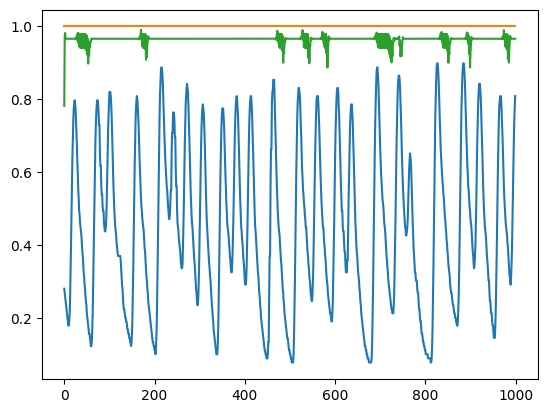

0.42174894


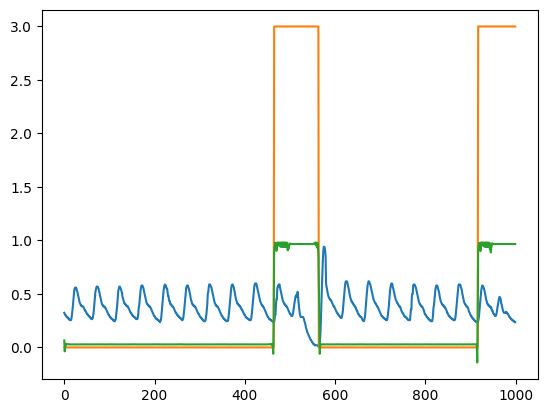

0.028294511


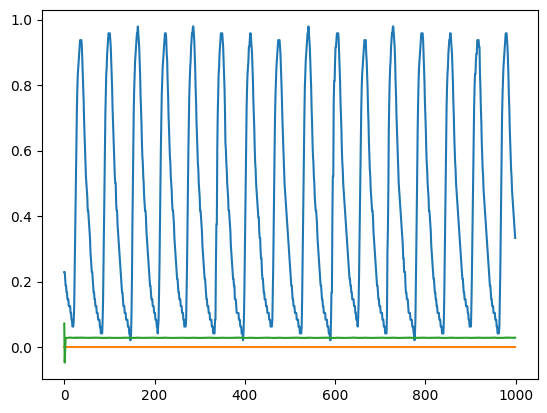

0.70447516


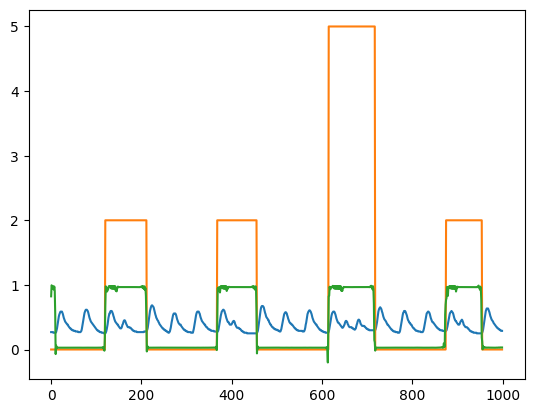

0.028472522


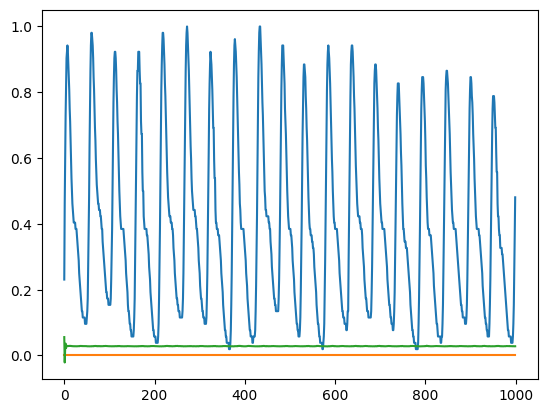

0.03985108


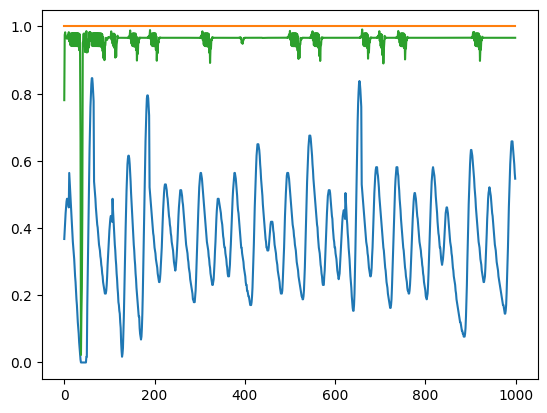

0.3355229


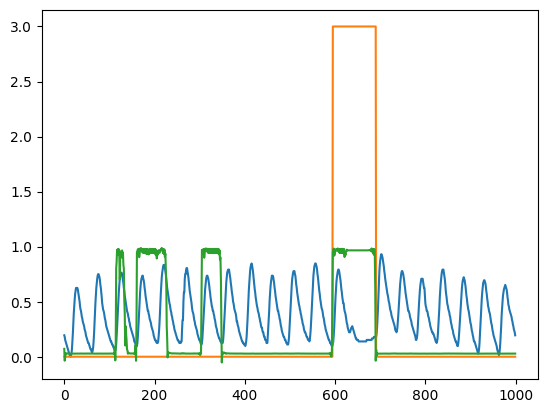

0.14309482


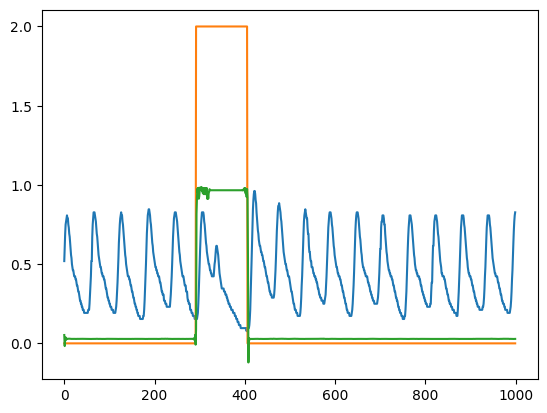

0.028446982


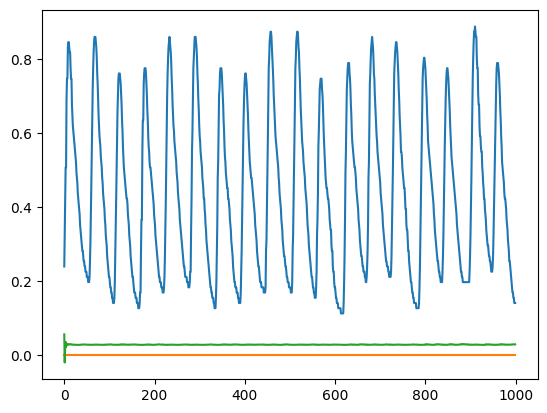

0.036943402


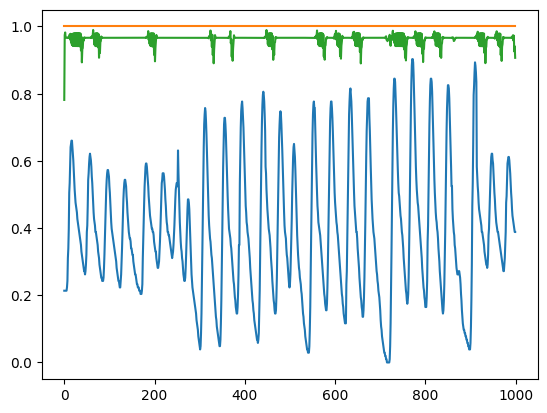

0.45829198


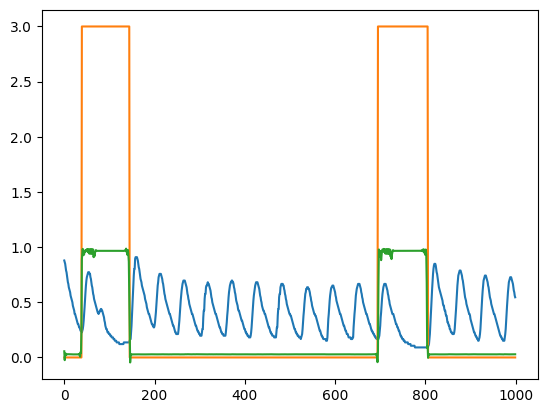

0.028356872


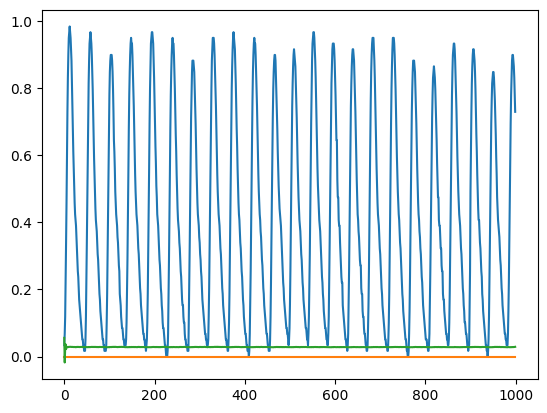

0.68805724


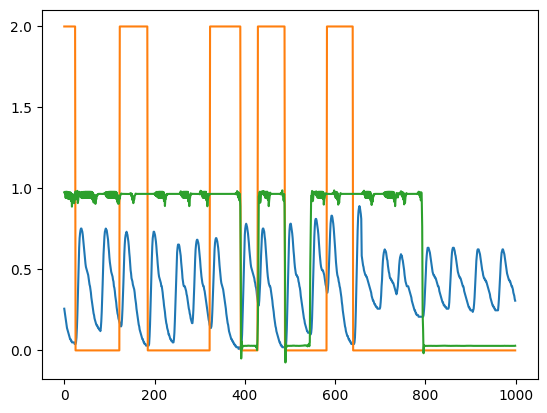

In [5]:
shower = performance()
shower.test(model,device,test_data,per_fnc = "series")
criterion = nn.L1Loss()
for i in range(100):
    output = torch.stack([test_data[i][1]]).to(device)
    input = torch.stack([test_data[i][0]]).to(device)
    y_hat = model.forward(input)
    loss = criterion(y_hat,output)
    # if loss.cpu().detach().numpy()<0.3:
    print(loss.cpu().detach().numpy())
    plt.plot(input.cpu().detach().numpy().flatten()[0:1000])
    plt.plot(output.cpu().detach().numpy().flatten()[0:1000])
    plt.plot(y_hat.cpu().detach().numpy().flatten()[0:1000])
    plt.show()